In [1]:
# record 10 audio examples
# For each audio, record seconds where trigger word(s) started and ended
# use _insert_ones helper function to insert Ys after the trigger word was said (you'll know when it was said because you've written down seconds in the previous step)

In [2]:
# times
#dev_1.wav - 4.877s | 4883 | 4598
#dev_2.wav - 3.068s | 
#dev_3.wav - 5.217s
#dev_4.wav - 1.380s
#dev_5.wav - 1.536s
#dev_6.wav - 3.249s

In [3]:
import io
import os
import sys
import glob
import random
import IPython
import numpy as np


from td_utils import *
from pydub import AudioSegment

/home/nik/anaconda3/envs/tensorflowenv/lib/python3.8/site-packages/pydub/utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


In [4]:
n_freq = 101
t_x = 5511
t_y = 1375

In [5]:
# run only once

def _raw_audio_prep(file_name):
    silent_audio = AudioSegment.silent(duration=10000)
    audio_f = AudioSegment.from_wav(file_name)[:10000]
    audio_f = silent_audio.overlay(audio_f)
    audio_f = audio_f.set_frame_rate(44100)
    audio_f.export(file_name, format="wav")

In [6]:
def _load_audio_files(file_list, dirname):
    audio_files = []
    
    for file in file_list:
        audio_f = AudioSegment.from_wav(dirname + file)
        audio_files.append(audio_f)
        
    return audio_files

In [7]:
def _insert_ones(y, segment_end_ms):
    segment_end_y = int(segment_end_ms*t_y/10000.0) 
    
    for i in range(segment_end_y+1, segment_end_y+51):
        if i < t_y:
            y[0, i] = 1
    
    return y

In [8]:
def _process_file(file_path, end_time_ms, y):
    y = _insert_ones(y, end_time_ms)
    
    return graph_spectrogram(file_path), y

In [9]:
os.listdir("../data/test/")

['dev_2.wav',
 'dev_5.wav',
 'dev_1.wav',
 'dev_4.wav',
 '.ipynb_checkpoints',
 'dev_6.wav',
 'dev_3.wav']

In [255]:
for file_name in os.listdir("../data/test/"):
    if file_name.endswith("wav"):
        _raw_audio_prep("../data/test/" + file_name)

In [256]:
# times
#dev_1.wav - 4.877s
#dev_2.wav - 3.068s
#dev_3.wav - 5.217s
#dev_4.wav - 1.380s
#dev_5.wav - 1.536s
#dev_6.wav - 3.249s

In [190]:
file_p_l = [
            ("/home/nik/Projects/jarvis/data/test/dev_1.wav", 4950),
            ("/home/nik/Projects/jarvis/data/test/dev_2.wav", 3207),
            ("/home/nik/Projects/jarvis/data/test/dev_3.wav", 5250),
            ("/home/nik/Projects/jarvis/data/test/dev_4.wav", 1475),
            ("/home/nik/Projects/jarvis/data/test/dev_5.wav", 1600),
            ("/home/nik/Projects/jarvis/data/test/dev_6.wav", 3308)
]

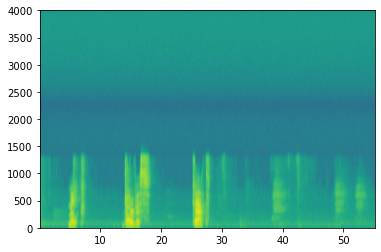

In [191]:
X = []
Y = []

for file_p in file_p_l:
    x, y = _process_file(file_p[0], file_p[1], np.zeros((1, t_y)))
    x = x.swapaxes(0, 1)
    x = np.expand_dims(x, axis=0)
    X.append(x)
    Y.append(y)

In [161]:
X[0].shape

(1, 5511, 101)

In [162]:
Y[0].shape

(1, 1375)

In [163]:
unique, counts = np.unique(Y[0], return_counts=True)
dict(zip(unique, counts))

{0.0: 1325, 1.0: 50}

In [192]:
X = np.vstack(X)
Y = np.vstack(Y)

In [193]:
X.shape

(6, 5511, 101)

In [194]:
Y.shape

(6, 1375)

In [195]:
np.save("X_test.npy", X)

In [196]:
np.save("Y_test.npy", Y)